<a href="https://colab.research.google.com/github/mkwak92/Project2/blob/main/Adult_Income.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset: Adult Income Dataset
- Source of data: https://www.kaggle.com/datasets/wenruliu/adult-income-dataset?resource=download
- Data Dictionary: http://www.cs.toronto.edu/~delve/data/adult/adultDetail.html
- Description of Data: This data shows an individual's annual income with the variables of education, age, gender, edication, marital status , etc
- Target: Income (whether it is higher or lower than 50k)
- Is this a classification or regression problem: This is a classification problem as it is between the class over 50k or under 50k for income
- There are 14 features
- There are 48,842 rows


In [3]:
import pandas as pd
filename = '/content/drive/MyDrive/Coding Dojo/Machine Learning: Week 3 Intro to Classification/adult.csv'
df = pd.read_csv(filename)
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


# Data Cleaning
- deleted unnecessary columns (education and fnlwght removed)

- deleted duplicate rows (removed duplicates)

- identified and addressed missing values (there are no missing values. But there is a category labeled '?' which will be handled as Missing

- identified and corrected inconsistencies in data for categorical values (i.e. Cat, cat, cats). There are no inconsistencies. Data matches data dictionary

- produced univariate visuals for the target and all features

- identified outliers


In [5]:
ml_df = df.copy()

In [6]:
ml_df.duplicated().sum()

52

In [7]:
ml_df.drop_duplicates(inplace = True)

In [8]:
ml_df.duplicated().sum()

0

In [9]:
ml_df['educational-num'].value_counts()

9     15770
10    10863
13     8013
14     2656
11     2060
7      1812
12     1601
6      1389
4       954
15      834
5       756
8       655
16      594
3       507
2       245
1        81
Name: educational-num, dtype: int64

educational-num corresponds to the education. No need to ordinal encode this and this education can be dropped when doing train/test split


1. Preschool
2. 1st-4th
3. 5th-6th
4. 7th-8th
5. 9th
6. 10th
7. 11th
8. 12th
9. HS-grad
10. Some-college
11. Assoc-voc
12. Assoc-acdm
13. Bachelors
14. Masters
15. Prof-school
16. Doctorate



In [10]:
ml_df[ml_df['educational-num'] ==  17] 

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income


In [11]:
ml_df['fnlwgt'].value_counts()

203488    21
190290    19
120277    19
125892    18
126569    18
          ..
293579     1
114874     1
96279      1
509350     1
257302     1
Name: fnlwgt, Length: 28523, dtype: int64

- There is no pattern to fnlwght column and the data dictionary does not provide much in here. I will remove this column and OneHotEncode workclass

In [12]:
ml_df[ml_df['fnlwgt'] ==  509350] 

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
17595,32,Private,509350,Some-college,10,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,50,Canada,>50K


In [13]:
ml_df.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [14]:
data_types = ml_df.dtypes
str_cols = data_types[data_types=='object'].index
str_cols

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country', 'income'],
      dtype='object')

In [15]:
for col in str_cols:
  print(f'- {col}:')
  print(ml_df[col].value_counts(dropna=False))
  print('\n\n')


- workclass:
Private             33860
Self-emp-not-inc     3861
Local-gov            3136
?                    2795
State-gov            1981
Self-emp-inc         1694
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64



- education:
HS-grad         15770
Some-college    10863
Bachelors        8013
Masters          2656
Assoc-voc        2060
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           954
Prof-school       834
9th               756
12th              655
Doctorate         594
5th-6th           507
1st-4th           245
Preschool          81
Name: education, dtype: int64



- marital-status:
Married-civ-spouse       22366
Never-married            16082
Divorced                  6630
Separated                 1530
Widowed                   1518
Married-spouse-absent      627
Married-AF-spouse           37
Name: marital-status, dtype: int64



- occupation:
Prof-specialty       6165
Craft-rep

In [16]:
ml_df.describe() #there aren't any outliers. it is feasible someone to be working 99 hours a week. No outliers

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48790.000000,4.879000e+04,48790.000000,48790.000000,48790.000000,48790.000000
mean,38.652798,1.896690e+05,10.078807,1080.217688,87.595573,40.425886
std,13.708493,1.056172e+05,2.570046,7455.905921,403.209129,12.392729
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175550e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781385e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376062e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [17]:
ml_df[ml_df['capital-gain'] ==  99999] 

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
83,44,Self-emp-inc,223881,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,99999,0,50,?,>50K
346,39,Private,198654,HS-grad,9,Divorced,Exec-managerial,Unmarried,Black,Female,99999,0,40,United-States,>50K
357,50,Self-emp-not-inc,165001,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,80,United-States,>50K
418,54,Self-emp-inc,159219,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,40,United-States,>50K
692,41,Private,191547,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,99999,0,55,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48109,47,Private,155664,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,99999,0,55,United-States,>50K
48253,43,Self-emp-inc,62026,Prof-school,15,Married-civ-spouse,Exec-managerial,Husband,White,Male,99999,0,40,United-States,>50K
48371,66,Private,115498,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,99999,0,55,?,>50K
48519,47,Private,294913,Prof-school,15,Married-civ-spouse,Exec-managerial,Husband,White,Male,99999,0,40,United-States,>50K


In [18]:
ml_df[ml_df['hours-per-week'] ==  99] 

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
384,29,Private,211208,11th,7,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,99,United-States,>50K
901,37,Private,112158,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,7688,0,99,United-States,>50K
1121,31,Local-gov,378426,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,99,Columbia,<=50K
1156,48,?,117054,5th-6th,3,Divorced,?,Not-in-family,White,Male,0,0,99,United-States,<=50K
1649,52,Private,254680,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,Black,Male,0,0,99,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47273,40,Self-emp-inc,104235,Masters,14,Never-married,Other-service,Own-child,White,Male,0,0,99,United-States,<=50K
47962,43,Private,266324,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,1902,99,United-States,>50K
47980,43,Self-emp-not-inc,163108,Some-college,10,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,99,United-States,<=50K
48750,58,Self-emp-inc,181974,Doctorate,16,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,99,?,<=50K


# Univariate Visuals of target and all features

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

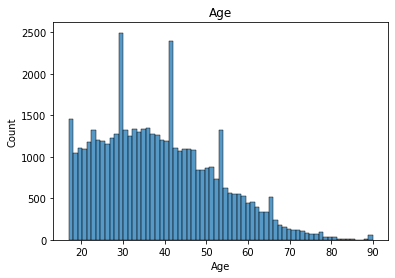

<Figure size 720x720 with 0 Axes>

In [20]:
# There is very wide range of ages 
sns.histplot(data=ml_df, x='age')
plt.title('Age')
#plt.ylabel('Age')
plt.xlabel('Age')
plt.figure(figsize=(10,10))
plt.show();

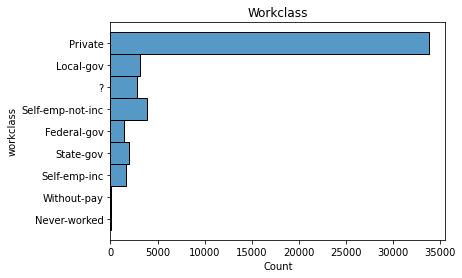

<Figure size 720x720 with 0 Axes>

In [21]:
# Most people work in the private working class
sns.histplot(data=ml_df, y='workclass')
plt.title('Workclass')
plt.ylabel('workclass')
plt.figure(figsize=(10,10))
plt.show();

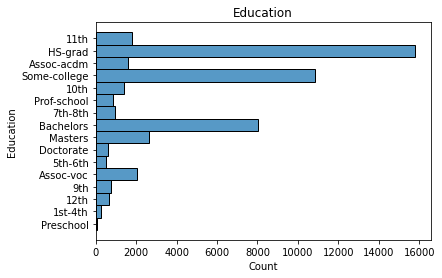

<Figure size 720x720 with 0 Axes>

In [22]:
#Most people have at least a HS Graduate degree
sns.histplot(data=ml_df, y='education')
plt.title('Education')
plt.ylabel('Education')
plt.figure(figsize=(10,10))
plt.show();

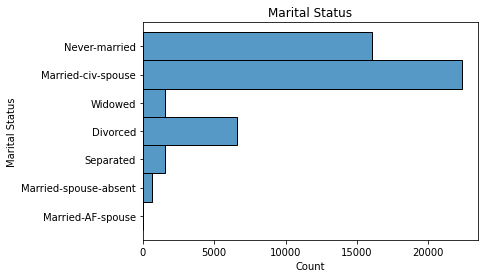

<Figure size 720x720 with 0 Axes>

In [23]:
#most of the people in this data set are never married or married
sns.histplot(data=ml_df, y='marital-status')
plt.title('Marital Status')
plt.ylabel('Marital Status')
plt.figure(figsize=(10,10))
plt.show();

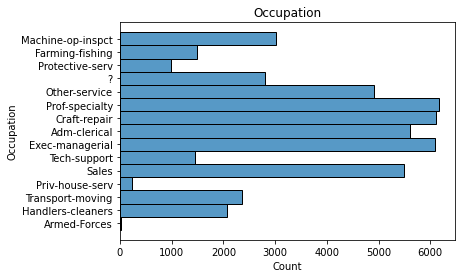

<Figure size 720x720 with 0 Axes>

In [24]:
#occupation is pretty diverse set of people
sns.histplot(data=ml_df, y='occupation')
plt.title('Occupation')
plt.ylabel('Occupation')
plt.figure(figsize=(10,10))
plt.show();

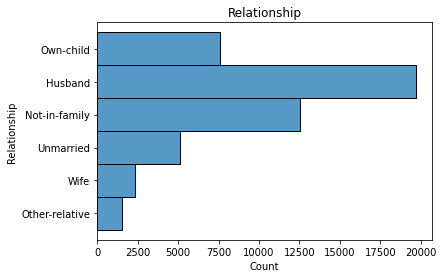

<Figure size 720x720 with 0 Axes>

In [25]:
# Most people in this dataset are Husbands which relates to why there are many males in this dataset
sns.histplot(data=ml_df, y='relationship')
plt.title('Relationship')
plt.ylabel('Relationship')
plt.figure(figsize=(10,10))
plt.show();

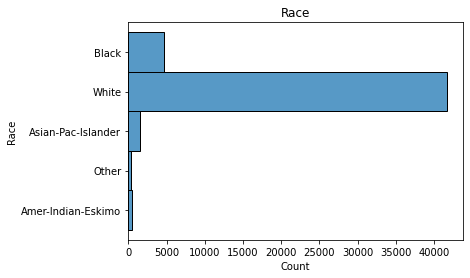

<Figure size 720x720 with 0 Axes>

In [26]:
# This dataset is dominated by White race with few minorities
sns.histplot(data=ml_df, y='race')
plt.title('Race')
plt.ylabel('Race')
plt.figure(figsize=(10,10))
plt.show();

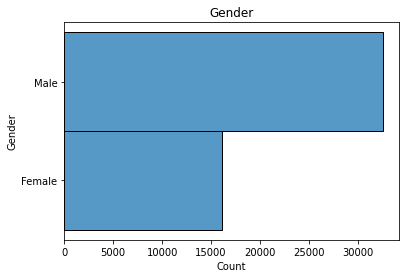

<Figure size 720x720 with 0 Axes>

In [27]:
# The dataset has more males than females
sns.histplot(data=ml_df, y='gender')
plt.title('Gender')
plt.ylabel('Gender')
plt.figure(figsize=(10,10))
plt.show();

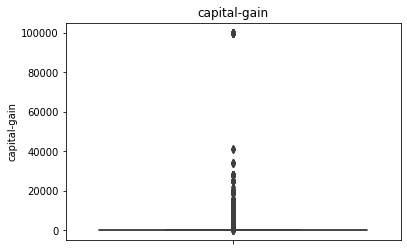

<Figure size 720x720 with 0 Axes>

In [28]:
# A lot of datapoints that have 0 capital gain and very few that have more than 0 capital gain

sns.boxplot(data=ml_df, y='capital-gain')
plt.title('capital-gain')
plt.ylabel('capital-gain')
plt.figure(figsize=(10,10))
plt.show();

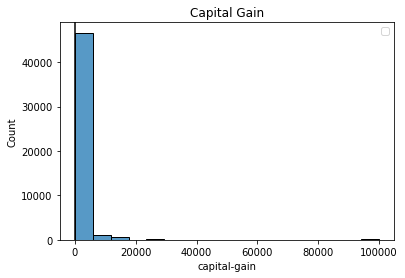

In [29]:
# A lot of datapoints that have 0 capital gain and very few that have more than 0 capital gain

ax = sns.histplot(data = ml_df, x = 'capital-gain');

ax.set(title= 'Capital Gain')
ax.axvline(ml_df['capital-gain'].median(),color = 'black')
ax.legend();

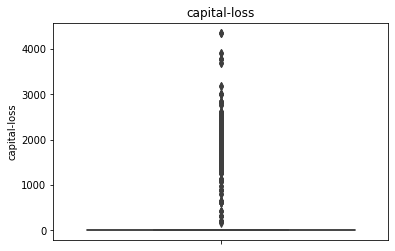

<Figure size 720x720 with 0 Axes>

In [30]:
# A lot of datapoints that have 0 capital loss and very few that have more than 0 capital loss

sns.boxplot(data=ml_df, y='capital-loss')
plt.title('capital-loss')
plt.ylabel('capital-loss')
plt.figure(figsize=(10,10))
plt.show();

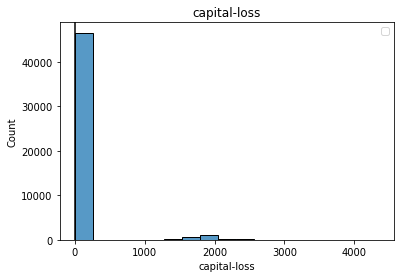

In [31]:
# A lot of datapoints that have 0 capital loss and very few that have more than 0 capital loss
ax = sns.histplot(data = ml_df, x = 'capital-loss');

ax.set(title= 'capital-loss')
ax.axvline(ml_df['capital-loss'].median(),color = 'black')
ax.legend();

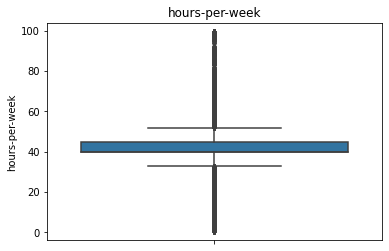

<Figure size 720x720 with 0 Axes>

In [32]:
# There are many outliers, but the average is still around 40 hours of week
sns.boxplot(data=ml_df, y='hours-per-week')
plt.title('hours-per-week')
plt.ylabel('hours-per-week')
plt.figure(figsize=(10,10))
plt.show();

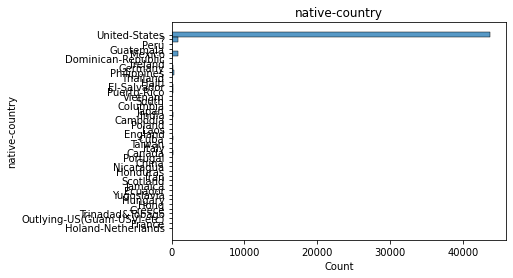

<Figure size 720x720 with 0 Axes>

In [33]:
# This plot/visual is not very helpful at all. There is very little data that is not related to the United States. 
sns.histplot(data=ml_df, y='native-country')
plt.title('native-country')
plt.ylabel('native-country')
plt.figure(figsize=(10,10))
plt.show();

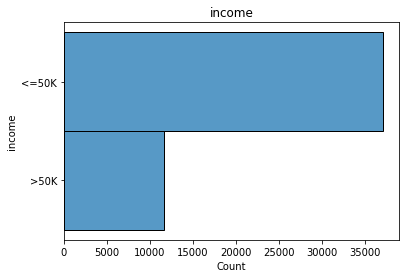

<Figure size 720x720 with 0 Axes>

In [34]:
# This dataset is a bit unbalanced wiht more people in this dataset that make less that 50k
sns.histplot(data=ml_df, y='income')
plt.title('income')
plt.ylabel('income')
plt.figure(figsize=(10,10))
plt.show();

# Correlations and Visualations

In [37]:
pip install dython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [38]:
from dython.nominal import associations

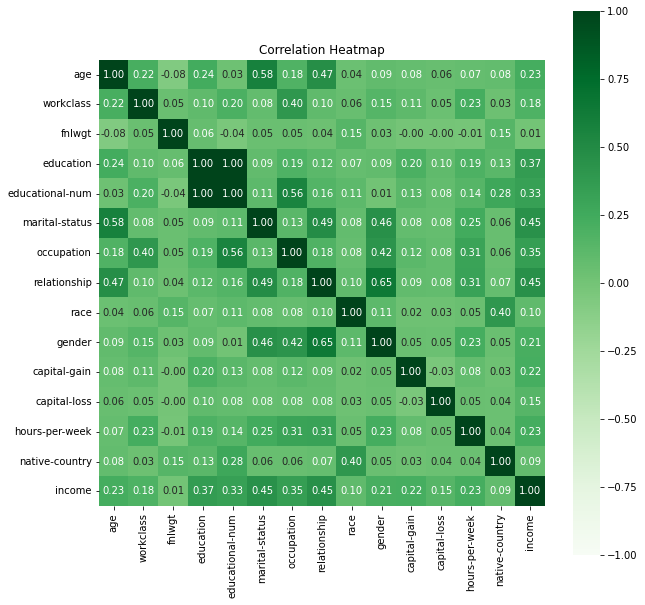

In [39]:
associations(ml_df, 
             figsize=(10,10), cmap = 'Greens', title = 'Correlation Heatmap');

- This heatmap of the features and the target (income). There is a strong correlation with occupation and the education-num. There is also a strong correlation between age and martial status. As I noted earlier, education and education-num are at 1 correlation as they are the same column just present differently. There are not too many negative correlations

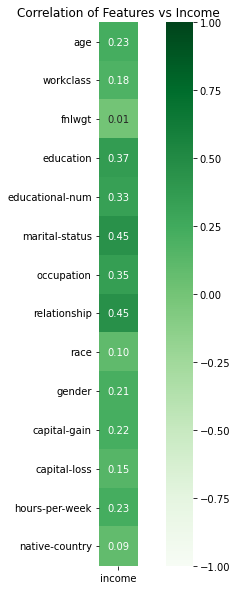

In [40]:
associations(ml_df, 
             figsize=(10,10), cmap = 'Greens', display_columns = 'income', hide_rows = 'income', title = 'Correlation of Features vs Income');

- Here is a heat map of the features with its correlation against the target, income. The highest correlation for the target is relationship, marital status, and education. Surpringsly, hours-per-week is not more correlated to work. 

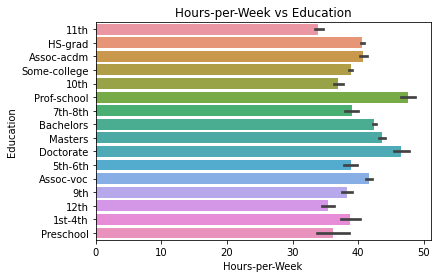

In [41]:
sns.barplot(data= ml_df, y='education', x='hours-per-week').set(title='Hours-per-Week vs Education')
plt.xlabel("Hours-per-Week")
plt.ylabel("Education");

- Here is a barplot with Education vs Hours-per-Week. It would make sense that the highest education of Prof-School and Doctorate works the longest hours. 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


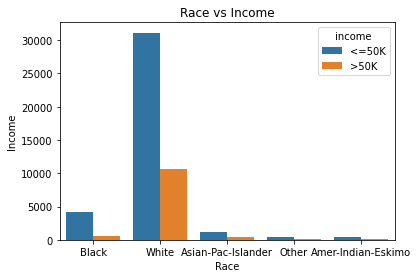

In [42]:
sns.countplot('race', data = ml_df, hue = 'income').set(title = 'Race vs Income')
plt.xlabel("Race")
plt.ylabel("Income");

- Here shows a visual that shows income by race. This data set is heavily dominated by White. A stakeholder may wonder if this dataset is an accurate representation as it is so dominated by one race. 

In [43]:
gender_income = pd.DataFrame(ml_df[['gender', 'income']].value_counts(normalize = True)).reset_index()
gender_income

,gender,income,0
0,Male,<=50K,0.465300
1,Female,<=50K,0.295286
2,Male,>50K,0.203156
3,Female,>50K,0.036257


In [44]:
gender_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   gender  4 non-null      object 
 1   income  4 non-null      object 
 2   0       4 non-null      float64
dtypes: float64(1), object(2)
memory usage: 224.0+ bytes


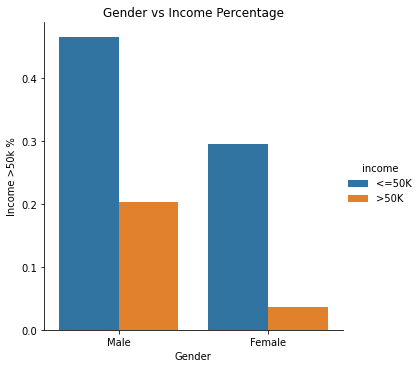

In [45]:
sns.catplot(data = gender_income, x = "gender", y= 0, hue = "income", kind = "bar").set(title = 'Gender vs Income Percentage')
plt.xlabel("Gender")
plt.ylabel("Income >50k %");

- Here shows a visual of the gender and income above or less than 50k in a form of a percentage. We can see that around 50% of the entire data set is male and make less or equal to than 50k.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


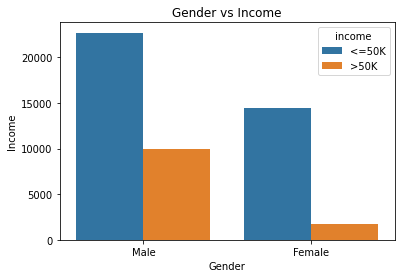

In [46]:
sns.countplot('gender', data = ml_df, hue = 'income').set(title = 'Gender vs Income')
plt.xlabel("Gender")
plt.ylabel("Income");

  - Here is a visual that shows how many Males and Females make more than 50k and less than 50k. This data set shows that many of the people regardless of gender make less than 50k. 

# Preprocessing

In [47]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

In [48]:
ml_df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [49]:
#replace the target (income) with 0 for less than or equal to 50k and 1 for above 50k
ml_df['income'].replace({'<=50K': 0, '>50K':1}, inplace = True)
ml_df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,0


In [50]:
#Identify X and y. Drop fnlwgt and education when assigning X. fnlwgt does not show a pattern as noted above, and education is nominal with education-num
X = ml_df.drop(['fnlwgt', 'education', 'income'], axis = 1)
y = ml_df['income']

In [51]:
X.head()

,age,workclass,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,25,Private,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States
1,38,Private,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States
2,28,Local-gov,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States
3,44,Private,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States
4,18,?,10,Never-married,?,Own-child,White,Female,0,0,30,United-States


In [52]:
y.head()

0    0
1    0
2    1
3    1
4    0
Name: income, dtype: int64

In [53]:
# perform train/test split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

In [54]:
len(X_train)

36592

In [55]:
len(y_train)

36592

In [56]:
len(X_test)

12198

In [57]:
len(y_test)

12198

In [58]:
cat_selector = make_column_selector(dtype_include = 'object')
num_cols = make_column_selector(dtype_include = 'number')
ohe = OneHotEncoder(sparse = False, handle_unknown = 'ignore')
scaler = StandardScaler()

In [59]:
from sklearn import set_config
set_config(display='diagram')
#num pipe
num_pipe = make_pipeline(scaler)
num_pipe

Pipeline(steps=[('standardscaler', StandardScaler())])

In [60]:
#cat pipe
cat_pipe = make_pipeline(ohe)
cat_pipe

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [61]:
num_tuple = (num_pipe, num_cols)
cat_tuple = (cat_pipe, cat_selector)

In [62]:
preprocessor = make_column_transformer(num_tuple,cat_tuple, remainder = 'drop')
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7ff615084dd0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7ff61202d910>)])

# Modeling - Logistic Regression

In [63]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter = 1000)
logreg_pipe = make_pipeline(preprocessor, logreg)
logreg_pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ff615084dd0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ff61202d910>)])),
                ('logisticregression', LogisticRegression(max_iter=1000))])

In [64]:
logreg_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ff615084dd0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ff61202d910>)])),
                ('logisticregression', LogisticRegression(max_iter=1000))])

In [65]:
logreg_pred_train = logreg_pipe.predict(X_train)
logreg_pred_test = logreg_pipe.predict(X_test)

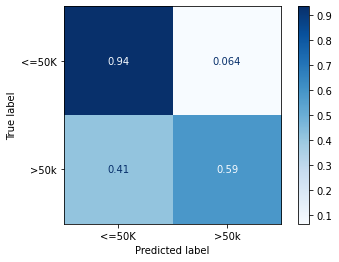

In [66]:
from sklearn.metrics import  ConfusionMatrixDisplay, \
 accuracy_score
labels = ['<=50K', '>50k']
ConfusionMatrixDisplay.from_predictions(y_test, logreg_pred_test, normalize = 'true', cmap = 'Blues', display_labels = labels)

In [67]:
print(logreg_pipe.score(X_train, y_train))
print(logreg_pipe.score(X_test, y_test))

0.8527547004809795
0.851860960813248


In [68]:
#create a list of c values and empty list for scores
c_values = [.0001, .001, .01, .1, 1, 10, 100, 1000]
train_scores = []
test_scores = []
#iterative over the c values
for c in c_values:
 
  # instantiate a model with each value of c and fit it on the data
  log_reg = LogisticRegression(C=c, max_iter=1000, solver='liblinear', penalty='l1')
  log_reg_pipe = make_pipeline(preprocessor, log_reg)
  log_reg_pipe.fit(X_train, y_train)
  # add the training and testing scores to our scores lists
  train_scores.append(log_reg_pipe.score(X_train, y_train))
  test_scores.append(log_reg_pipe.score(X_test, y_test))

In [69]:
# print a dictionary of values of C and accuracy scores
{c:score for c, score in zip(c_values, test_scores)}

{0.0001: 0.7597966879816364,
 0.001: 0.8217740613215281,
 0.01: 0.8471060829644204,
 0.1: 0.852106902770946,
 1: 0.8515330382029841,
 10: 0.8516150188555501,
 100: 0.8516969995081161,
 1000: 0.8517789801606821}

- We will use C = .1 as it has the highest score

In [70]:
logreg_1000 = LogisticRegression(max_iter = 1000, C = 1000 )
logreg_pipe_1000 = make_pipeline(preprocessor, logreg_1000)
logreg_pipe_1000

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ff615084dd0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ff61202d910>)])),
                ('logisticregression',
                 LogisticRegression(C=1000, max_iter=1000))])

In [71]:
logreg_pipe_1000.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ff615084dd0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ff61202d910>)])),
                ('logisticregression',
                 LogisticRegression(C=1000, max_iter=1000))])

In [72]:
logreg_pred_train_1000 = logreg_pipe_1000.predict(X_train)
logreg_pred_test_1000 = logreg_pipe_1000.predict(X_test)

In [73]:
print(logreg_pipe_1000.score(X_train, y_train))
print(logreg_pipe_1000.score(X_test, y_test))

0.8528640139921294
0.8517789801606821


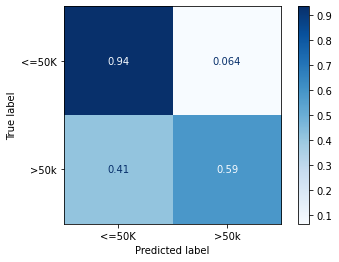

In [74]:
labels = ['<=50K', '>50k']
ConfusionMatrixDisplay.from_predictions(y_test, logreg_pred_test_1000, normalize = 'true', cmap = 'Blues', display_labels = labels);

In [75]:
train_probs = logreg_pipe_1000.predict_proba(X_train)
test_probs = logreg_pipe_1000.predict_proba(X_test)
train_probs[:5]

array([[0.97541233, 0.02458767],
       [0.27476842, 0.72523158],
       [0.56773152, 0.43226848],
       [0.9987131 , 0.0012869 ],
       [0.9796895 , 0.0203105 ]])

In [76]:
# now to test to see if we lower our Threshold to see if we can reduce Type 2 Error
thresh = 0.2

# use list comprehension to apply threshold to 2nd value in each prediction
train_thresh = [1 if x[1] > thresh else 0 for x in train_probs]
test_thresh = [1 if x[1] > thresh else 0 for x in test_probs]

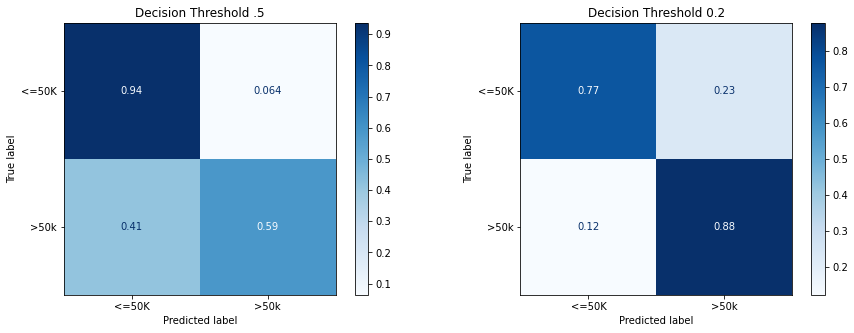

In [108]:
# plot confusion matrix for both .2 and 'thresh' thresholds
fig, axes = plt.subplots(1,2, figsize=(15,5))

ConfusionMatrixDisplay.from_predictions(y_test, logreg_pred_test_1000, 
               normalize='true', cmap = 'Blues', display_labels=labels,                
               ax=axes[0])

axes[0].set_title('Decision Threshold .5')

ConfusionMatrixDisplay.from_predictions(y_test, test_thresh, 
               normalize='true', cmap = 'Blues', display_labels=labels,  
               ax=axes[1])

axes[1].set_title(f'Decision Threshold {thresh}');


- As we lowered our Threshold to .2, we've lowered our Type2 Error to .12. This is much lower than the original Type2 error of .41. Although, we had to make a greater Type1 error, depending on how the stakeholder wants, we can reduce Type2 error. 

Text(0, 0.5, 'Accuracy Score')

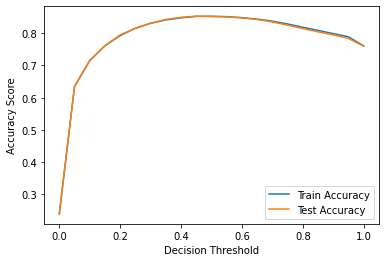

In [109]:
thresholds = np.array(range(0,105,5)) / 100

score_df = pd.DataFrame(index=thresholds, columns=['Train Accuracy'])

for thresh in thresholds:
  thresh = thresh 
  train_thresh = [1 if x[1] > thresh else 0 for x in train_probs]
  test_thresh = [1 if x[1] > thresh else 0 for x in test_probs]

  score_df.loc[thresh, 'Train Accuracy'] = accuracy_score(train_thresh, y_train)
  score_df.loc[thresh, 'Test Accuracy'] = accuracy_score(test_thresh, y_test)

score_df.plot()
plt.xlabel('Decision Threshold')
plt.ylabel('Accuracy Score')

In [110]:
score_df.sort_values(by='Test Accuracy', ascending=False)

,Train Accuracy,Test Accuracy
0.45,0.852563,0.852845
0.50,0.852864,0.851779
0.55,0.851662,0.850877
0.40,0.847972,0.849566
0.60,0.848519,0.847516
0.35,0.841331,0.843007
0.65,0.843928,0.842843
0.70,0.837615,0.835301
0.30,0.831083,0.830628
0.75,0.828788,0.825053


In [105]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, \
r2_score
# Function to evaluate a regression model
def evaluate_regression(y_true, y_pred, name='model'):
  """Pass true and predicted targets and optionally give the model a name.
  Returns a dataframe with metrics"""
  
  scores = pd.DataFrame(index=['R2','MAE','RMSE'],
                        columns=[name])
  scores.loc['R2', name] = r2_score(y_true, y_pred)
  scores.loc['MAE', name] = mean_absolute_error(y_true, y_pred)
  scores.loc['RMSE', name] = np.sqrt(mean_squared_error(y_true, y_pred))
  return scores


In [106]:
evaluate_regression(y_test, logreg_pipe_1000.predict(X_test))

,model
R2,0.187855
MAE,0.148221
RMSE,0.384995


- The best accuracy for the threshold would be .45, but this would lead to a higher Type2 error than having a threshold of .2

In [113]:
# now to test to see if we lower our Threshold to see if we can reduce Type 2 Error
thresh_45 = 0.45

# use list comprehension to apply threshold to 2nd value in each prediction
train_thresh_45 = [1 if x[1] > thresh_45 else 0 for x in train_probs]
test_thresh_45 = [1 if x[1] > thresh_45 else 0 for x in test_probs]

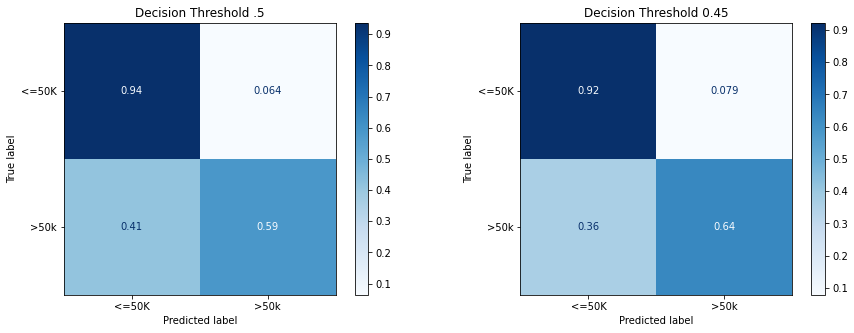

In [114]:
# plot confusion matrix for both .2 and 'thresh' thresholds
fig, axes = plt.subplots(1,2, figsize=(15,5))

ConfusionMatrixDisplay.from_predictions(y_test, logreg_pred_test_1000, 
               normalize='true', cmap = 'Blues', display_labels=labels,                
               ax=axes[0])

axes[0].set_title('Decision Threshold .5')

ConfusionMatrixDisplay.from_predictions(y_test, test_thresh_45, 
               normalize='true', cmap = 'Blues', display_labels=labels,  
               ax=axes[1])

axes[1].set_title(f'Decision Threshold {thresh_45}');


# Modeling - KNN 

In [78]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [79]:
#make pipeline for KNN
knn_pipe = make_pipeline(preprocessor, knn)
knn_pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ff615084dd0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ff61202d910>)])),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [80]:
#make predictions
knn_train_pred = knn_pipe.predict(X_train)
knn_test_pred = knn_pipe.predict(X_test)

In [81]:
#DEFAULT
acc_score_train = knn_pipe.score(X_train,y_train)
acc_score_test = knn_pipe.score(X_test, y_test)
print(acc_score_train)
print(acc_score_test)

0.8824333187581985
0.837596327266765


Tune the model

In [82]:
knn_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer', ColumnTransformer(transformers=[('pipeline-1',
                                    Pipeline(steps=[('standardscaler',
                                                     StandardScaler())]),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7ff615084dd0>),
                                   ('pipeline-2',
                                    Pipeline(steps=[('onehotencoder',
                                                     OneHotEncoder(handle_unknown='ignore',
                                                                   sparse=False))]),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7ff61202d910>)])),
  ('kneighborsclassifier', KNeighborsClassifier())],
 'verbose': False,
 'columntransformer': ColumnTransformer(transformers=[('pipeline-1',
                                  Pipeline(steps=[('standardscaler',
    

In [83]:
knn_params = {'kneighborsclassifier__n_neighbors':[3,5,10,15],
              'kneighborsclassifier__leaf_size':[20,25,30,35]}

In [84]:
from sklearn.model_selection import  GridSearchCV

knn_gs = GridSearchCV(knn_pipe,knn_params)
knn_gs

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('standardscaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7ff615084dd0>),
                                                                        ('pipeline-2',
                                                                         Pipeline(steps=[('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse=False))]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7ff61202d910>)])),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier())]),
             param_grid={'kneighborsclassifier__leaf_size': [20, 25, 30, 35],
                         'kneighborsclassifier__n_neighbors': [3, 5, 10, 15]})

In [85]:
knn_gs.fit(X_train,y_train)

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('standardscaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7ff615084dd0>),
                                                                        ('pipeline-2',
                                                                         Pipeline(steps=[('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse=False))]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7ff61202d910>)])),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier())]),
             param_grid={'kneighborsclassifier__leaf_size': [20, 25, 30, 35],
                         'kneighborsclassifier__n_neighbors': [3, 5, 10, 15]})

In [86]:
knn_gs.best_params_

{'kneighborsclassifier__leaf_size': 20,
 'kneighborsclassifier__n_neighbors': 15}

In [87]:
knn_params_2 = {'kneighborsclassifier__n_neighbors':[15,18,20,22],
              'kneighborsclassifier__leaf_size':[10,15,18,20]}

In [88]:
knn_gs_2 = GridSearchCV(knn_pipe,knn_params_2)
knn_gs_2

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('standardscaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7ff615084dd0>),
                                                                        ('pipeline-2',
                                                                         Pipeline(steps=[('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse=False))]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7ff61202d910>)])),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier())]),
             param_grid={'kneighborsclassifier__leaf_size': [10, 15, 18, 20],
                         'kneighborsclassifier__n_neighbors': [15, 18, 20, 22]})

In [89]:
%%time
knn_gs_2.fit(X_train,y_train)

CPU times: user 9min 20s, sys: 24.9 s, total: 9min 45s
Wall time: 7min 51s


GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('standardscaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7ff615084dd0>),
                                                                        ('pipeline-2',
                                                                         Pipeline(steps=[('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse=False))]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7ff61202d910>)])),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier())]),
             param_grid={'kneighborsclassifier__leaf_size': [10, 15, 18, 20],
                         'kneighborsclassifier__n_neighbors': [15, 18, 20, 22]})

In [90]:
knn_gs_2.best_params_

{'kneighborsclassifier__leaf_size': 10,
 'kneighborsclassifier__n_neighbors': 20}

In [91]:
#Best params
acc_score_train = knn_gs_2.score(X_train,y_train)
acc_score_test = knn_gs_2.score(X_test, y_test)
print(acc_score_train)
print(acc_score_test)

0.8597780935723656
0.8469421216592884


In [92]:
%%time
kn_best_pred_test = knn_gs_2.predict(X_test)

CPU times: user 14.4 s, sys: 636 ms, total: 15 s
Wall time: 12.6 s


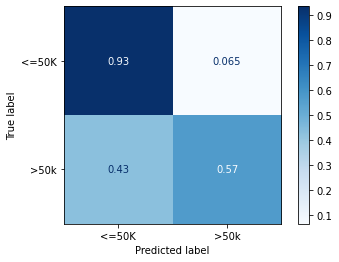

In [93]:
labels = ['<=50K', '>50k']
ConfusionMatrixDisplay.from_predictions(y_test, kn_best_pred_test, normalize = 'true', cmap = 'Blues', display_labels = labels)

In [94]:
knn_train_probs = knn_gs_2.predict_proba(X_train)
knn_test_probs = knn_gs_2.predict_proba(X_test)
knn_train_probs[:5]

array([[1.  , 0.  ],
       [0.15, 0.85],
       [0.75, 0.25],
       [1.  , 0.  ],
       [1.  , 0.  ]])

In [121]:
# now to test to see if we lower our Threshold to see if we can reduce Type 2 Error
knn_thresh = 0.3

# use list comprehension to apply threshold to 2nd value in each prediction
knn_train_thresh = [1 if x[1] > knn_thresh else 0 for x in knn_train_probs]
knn_test_thresh = [1 if x[1] > knn_thresh else 0 for x in knn_test_probs]

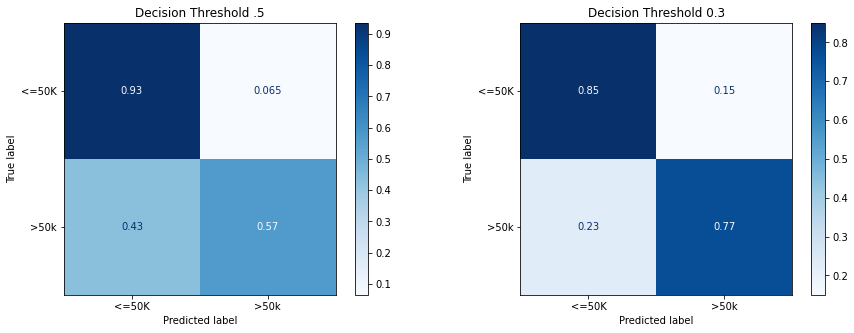

In [123]:
# plot confusion matrix for both .2 and 'thresh' thresholds
fig, axes = plt.subplots(1,2, figsize=(15,5))

ConfusionMatrixDisplay.from_predictions(y_test, kn_best_pred_test, 
               normalize='true', cmap = 'Blues', display_labels=labels,                
               ax=axes[0])

axes[0].set_title('Decision Threshold .5')

ConfusionMatrixDisplay.from_predictions(y_test, knn_test_thresh, 
               normalize='true', cmap = 'Blues', display_labels=labels,  
               ax=axes[1])

axes[1].set_title(f'Decision Threshold {knn_thresh}');


In [127]:
evaluate_regression(y_test,  knn_gs_2.predict(X_test))

,model
R2,0.161353
MAE,0.153058
RMSE,0.391226


# PCA Test on dataset

In [97]:
from sklearn.decomposition import PCA

In [98]:
pca = PCA(n_components= .95)
knn_2 = KNeighborsClassifier(leaf_size = 10, n_neighbors = 20) #best params


In [99]:
knn_pca_pipe = make_pipeline(preprocessor, pca, knn_2)
knn_pca_pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ff615084dd0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ff61202d910>)])),
                ('pca', PCA(n_components=0.95)),
                ('kneighborsclassifier',
                 KNeighborsClassifier(leaf_size=10, n_neighbors=20))])

In [100]:
%%time
knn_pca_pipe.fit(X_train, y_train)

CPU times: user 1.14 s, sys: 122 ms, total: 1.26 s
Wall time: 798 ms


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ff615084dd0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ff61202d910>)])),
                ('pca', PCA(n_components=0.95)),
                ('kneighborsclassifier',
                 KNeighborsClassifier(leaf_size=10, n_neighbors=20))])

In [101]:
%%time
pca_predictions = knn_pca_pipe.predict(X_test)

CPU times: user 11.8 s, sys: 667 ms, total: 12.5 s
Wall time: 11.1 s


In [102]:
# calculate classification accuracy
pca_acc_score = knn_pca_pipe.score(X_test, y_test)
pca_acc_score



0.8463682570913265

In [124]:
evaluate_regression(y_test,  knn_pca_pipe.predict(X_test))

,model
R2,0.158208
MAE,0.153632
RMSE,0.391959


# Best Model

- The best model out of Logistic Regression and KNN is the Logistic Regression. The Logistic Regression had an accuracy of 85.28% with a decision threshold of .45. The Logisitc Regression had a low R^2 of 0.187855. Using .45 as the threshold, this model a Type2 Error of .36. I believe if we actually made the "Correct Class" being <= 50k, our model could possibly predict this class, as it predicted this group 92% of the time. 